##### Campana Davide -
# Markowitz-style portfolio with PCA implementation

This project aims to construct stock portfolios using the Markowit model. The weights of each portfolio are randomly generated and vary at each time instant. In addition, to make the covariance matrix of the stocks more stable, it is calculated using the PCA principal components model. 

The subject of the analysis will be the sixteen French stocks forming part of the STOXX50 stock index (Air Liquide, Airbus, AXA, BNP Paribas, Danone, EssilorLuxottica, Hermès, Kering, L'Orèal, LVMH Moët Hennessy Louis Vuitton, Pernod Ricard, Safran, Sanofi, Schneider Electric, TotalEnergies, Vinci SA) in the period between the beginning and the end of the year 2021. 

### Step 1 - Define the database of stock returns 
After loading the libraries necessary for all the code, the closing prices of the 16 French stocks, in the chosen time interval, on which all the analysis will be based, are downloaded. Since they are all stocks that are part of the STOXX50 stock index, information on the identifying symbol is gathered from the dedicated wikipedia page (https://en.wikipedia.org/wiki/EURO_STOXX_50). 

This information is entered into the 'Stock_prices' dataframe by checking for missing data. For the continuation of the project, however, we need the returns because as Figure 1 shows, the closing prices have different dimensionality, in other words, they are not stationary.

\begin{equation}
R_j = \frac{P_{t}-P_{t-1}}{P_{t-1}}
\end{equation}

Accordingly, the arithmetic returns of the securities considered are calculated, applying the formula below. As a demonstration of their stationarity, their dimensionality - Figure 2 - and their fluctuations in - Figure 3 - are graphed.

In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime as dt

from matplotlib import pyplot as plt
from matplotlib import style

import squarify
import seaborn as sns

In [2]:
############################## DEFINE TIME INTERVAL OF ANALYSIS AND DOWNLOAD TICKERS #################################
# intervallo temporale oggetto di analisi 
start = dt.datetime(2021,1,1)
end = dt.datetime(2021,12,31)

# selezione delle 15 aziende francesi comprese nello STOXX 50 
wiki = pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[2]
wiki.drop(wiki[wiki.Registeredoffice != 'France'].index, inplace = True)

############################## DOWNLOAD STOCK'S CLOSING PRICES ##############################
symbols = wiki['Ticker']
Stock_prices = web.DataReader(symbols,'yahoo',start,end)['Adj Close']


############################## SAVE STOCKS DATA ######################################
Stock_prices.to_csv('10StocksPrices.csv')

#flag
print('DOWNLOAD COMPLETATO')
print('VALORI MANCANTI NEL DATAFRAME:',Stock_prices.isnull().sum().sum())
print('DATABASE SALVATO CON NOME:''10StocksPrices.csv')

DOWNLOAD COMPLETATO
VALORI MANCANTI NEL DATAFRAME: 0
DATABASE SALVATO CON NOME:10StocksPrices.csv


In [3]:
############################## LOAD DATAFRAME OF STOCK PRICE IF PRE-EXISTING ##############################
Stock_prices = pd.read_csv('10StocksPrices.csv', date_parser = lambda dt: pd.to_datetime(dt, format = "%Y-%m-%d",),index_col = 0)

#flag
print('IL DATAFRAME 10StocksPrices.csv è STATO SCARICATO')
print('VALORI MANCANTI NEL DATAFRAME:',Stock_prices.isnull().sum().sum())
Stock_prices.head()

IL DATAFRAME 10StocksPrices.csv è STATO SCARICATO
VALORI MANCANTI NEL DATAFRAME: 0


,AI.PA,AIR.PA,CS.PA,BNP.PA,BN.PA,EL.PA,RMS.PA,KER.PA,OR.PA,MC.PA,RI.PA,SAF.PA,SAN.PA,SU.PA,TTE.PA,DG.PA
Date,,,,,,,,,,,,,,,,
2021-01-04,119.472633,88.619408,17.146141,38.202652,50.789730,125.674194,874.707886,560.997864,303.690125,500.871674,154.843277,115.168350,73.542130,116.691177,31.498882,78.410973
2021-01-05,118.203041,88.560257,17.139086,38.122711,50.976456,124.356445,860.465637,552.110046,300.572327,495.101074,151.623474,115.416237,73.532814,115.588959,32.327679,77.083900
2021-01-06,118.465714,88.895447,17.871223,40.227810,51.424606,125.430161,858.487549,555.684448,300.864624,491.286560,149.428146,115.317085,73.085983,118.799767,33.748474,80.041374
2021-01-07,119.385071,88.353226,17.981485,41.133804,50.621677,125.576576,865.806458,557.809814,299.695496,504.001495,151.916168,114.821312,72.350563,121.243813,34.117332,80.174088
2021-01-08,120.085526,88.826439,17.963844,40.223370,49.501312,127.772827,877.674927,566.407837,298.428894,513.782288,154.111496,115.366661,73.346634,122.537720,34.140106,81.197830


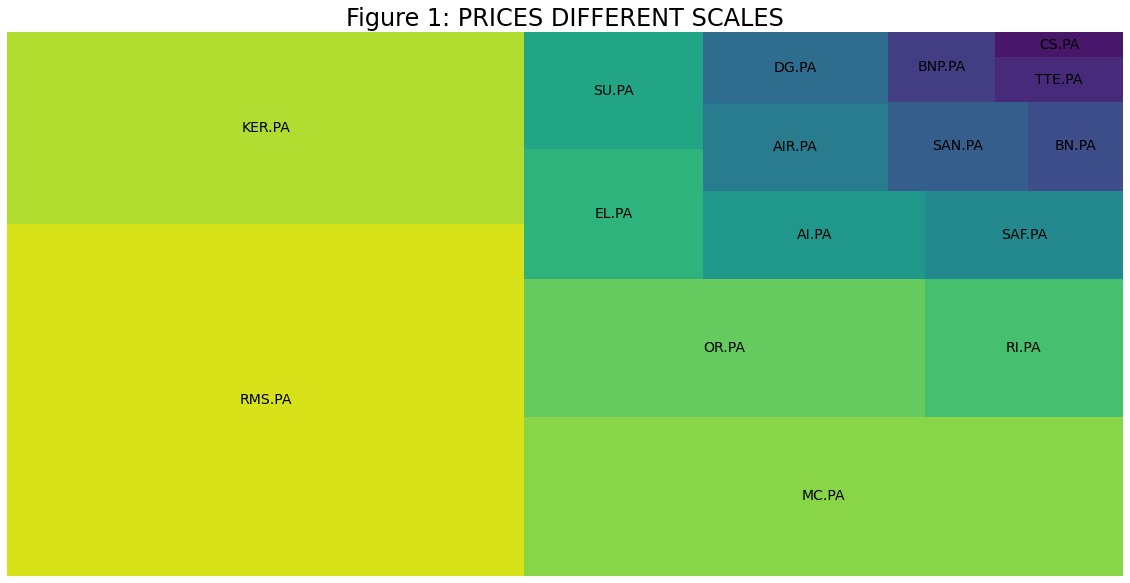

In [4]:
############################## PLOT STOCK PRICE ##############################
data = Stock_prices.mean().sort_values(ascending = False)
plt.figure(figsize = (20,10))
squarify.plot(sizes = data,label = data.index.tolist(), 
              color=sns.color_palette('viridis_r', len(data)),
             text_kwargs={'fontsize': 14})
plt.title('Figure 1: PRICES DIFFERENT SCALES', size = 24)
plt.axis('off')
plt.show()

In [5]:
############################## COMPUTE RETURNS ###################################
Stocks_returns = Stock_prices/Stock_prices.shift(1)
Stocks_returns.drop(Stocks_returns.index[0], axis = 0, inplace = True)

#flag
print('RENDIMETI CALCOLATI','\n','VALORI MANCANTI DAL DATABASE DEI RENDIMENTI:', Stocks_returns.isnull().sum().sum())
Stocks_returns.tail()

RENDIMETI CALCOLATI 
 VALORI MANCANTI DAL DATABASE DEI RENDIMENTI: 0


,AI.PA,AIR.PA,CS.PA,BNP.PA,BN.PA,EL.PA,RMS.PA,KER.PA,OR.PA,MC.PA,RI.PA,SAF.PA,SAN.PA,SU.PA,TTE.PA,DG.PA
Date,,,,,,,,,,,,,,,,
2021-12-27,1.012759,1.005910,1.008689,1.010544,1.018484,1.006057,1.004900,1.017467,0.990056,1.012406,0.997631,0.999813,1.008081,1.011847,1.004020,1.016481
2021-12-28,1.007087,1.009614,1.007274,1.007287,1.003483,1.009354,1.004551,1.002289,1.007055,1.006196,1.001899,1.001875,1.003500,1.003826,1.006673,1.001315
2021-12-29,0.995179,0.988538,0.997909,0.998191,1.000183,0.997018,1.000647,1.004139,0.994657,0.996032,1.003792,0.991392,0.999100,0.999192,0.988952,1.003282
2021-12-30,1.006154,1.004995,1.001143,0.999341,1.003105,1.002350,0.994502,1.006112,1.002268,1.002885,1.000944,1.010570,1.003716,0.998844,1.003240,1.003054
2021-12-31,0.997657,0.997160,0.996196,1.001648,0.993991,0.997868,0.999024,0.998729,0.993211,0.995890,0.997642,1.005416,0.993829,0.997802,0.993987,1.010111


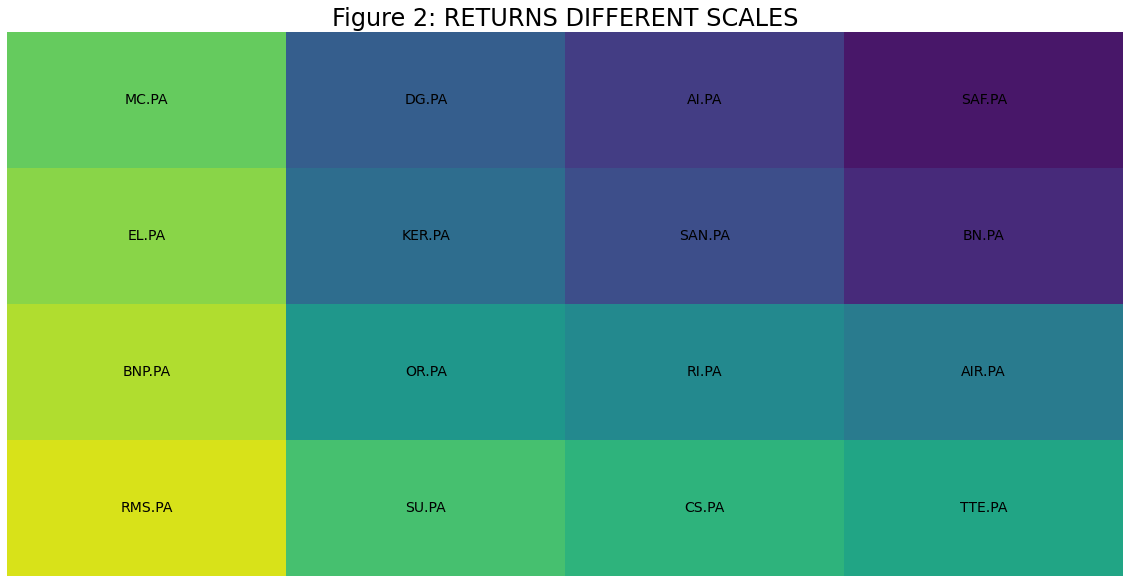

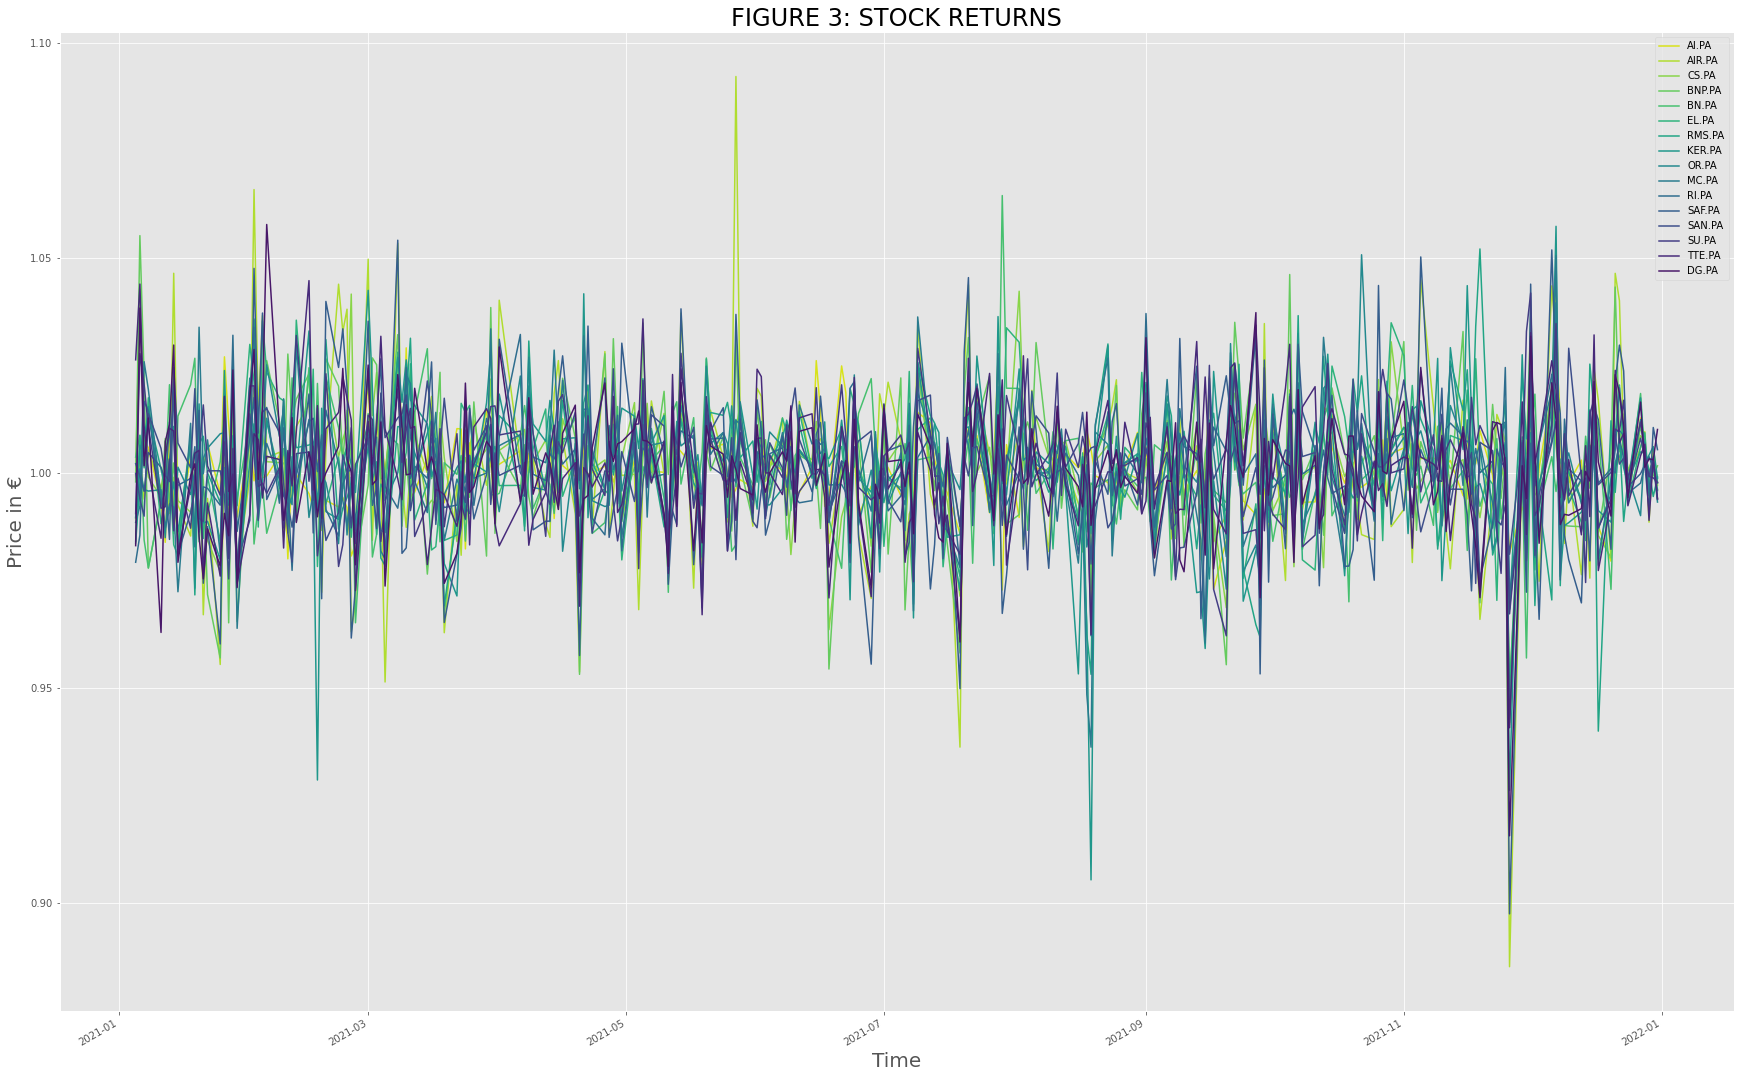

In [6]:
############################## PLOT RETURNS ###################################
data = Stocks_returns.mean().sort_values(ascending = False)

plt.figure(figsize = (20,10))
squarify.plot(sizes = data,label = data.index.tolist(), 
              color=sns.color_palette('viridis_r', len(data)),
             text_kwargs={'fontsize': 14})
plt.title('Figure 2: RETURNS DIFFERENT SCALES', size = 24)
plt.axis('off')
plt.show()

style.use('ggplot')
Stocks_returns.plot(figsize = (30,20), 
                    color = sns.color_palette('viridis_r', len(data)))
plt.title('FIGURE 3: STOCK RETURNS', fontsize = 24)
plt.ylabel('Price in €', fontsize = 20)
plt.xlabel('Time', fontsize = 20)
plt.show()

### Step 2 - Factor construction by PCA
To obtain more stable covariance estimates for the subsequent points, the returns are expressed in a factor regression model:

\begin{equation}
r_{i,t}= f_t' \beta_{i,t} + \eta_{i, t} \qquad i=1,\ldots, k
\end{equation}

and in matrix form:
\begin{equation}
\mathbf{r}_t= \mathbf{f}_t' \mathbf{\beta} + \mathbf{\eta}
\end{equation}
where $\mathbf{\beta}$ is a matrix $k \times p$ and $\mathbf{f}$ is a factor's vector $p \times 1$ 

Consequently, the covariance matrix of returns can be expressed as follows:

\begin{equation}
\Sigma_t= \mathbf{\beta}_t \Sigma_t^f \mathbf{\beta}'_t + \Omega_t
\end{equation}

The calculation of the factors is based on the principal components model (PCA), a number of which is chosen to explain approximately 85% of the variance of the returns. Having defined the number of factors, we proceed to the calculation of the various parameters including the factor betas, $\mathbf{\beta_t}$, the error term covariance matrix, $\mathbf{\Omega_t}$, and the returns covariance matrix, $\mathbf{\Sigma_t}$. A 28-day moving average is used for these regressions. the result will be three-dimensional arrays where the third dimension is time.

In [7]:
from statsmodels.multivariate.pca import PCA
import statsmodels.api as sm

############################## RUN PCA ###################################
pca_model = PCA(Stocks_returns,standardize=False, demean=True, missing='fill-em')
summary = pd.DataFrame({'Variance' : (pca_model.eigenvals/pca_model.eigenvals.sum()),
                          'VarianceCum' :((pca_model.eigenvals/pca_model.eigenvals.sum()).cumsum()),                         
                        'PC' : np.arange(1, len((pca_model.eigenvals/pca_model.eigenvals.sum()))+1)})

#flog                          
print('CALCOLO DEL MODELLO PCA COMPLETATO','\n','TABELLA METRICHE:','\n',summary)

CALCOLO DEL MODELLO PCA COMPLETATO 
 TABELLA METRICHE: 
     Variance  VarianceCum  PC
0   0.460582     0.460582   1
1   0.147861     0.608442   2
2   0.076348     0.684790   3
3   0.055637     0.740427   4
4   0.044122     0.784549   5
5   0.032577     0.817127   6
6   0.028276     0.845402   7
7   0.024423     0.869825   8
8   0.022866     0.892691   9
9   0.021274     0.913966  10
10  0.019659     0.933625  11
11  0.018701     0.952326  12
12  0.014159     0.966485  13
13  0.013029     0.979514  14
14  0.011435     0.990949  15
15  0.009051     1.000000  16


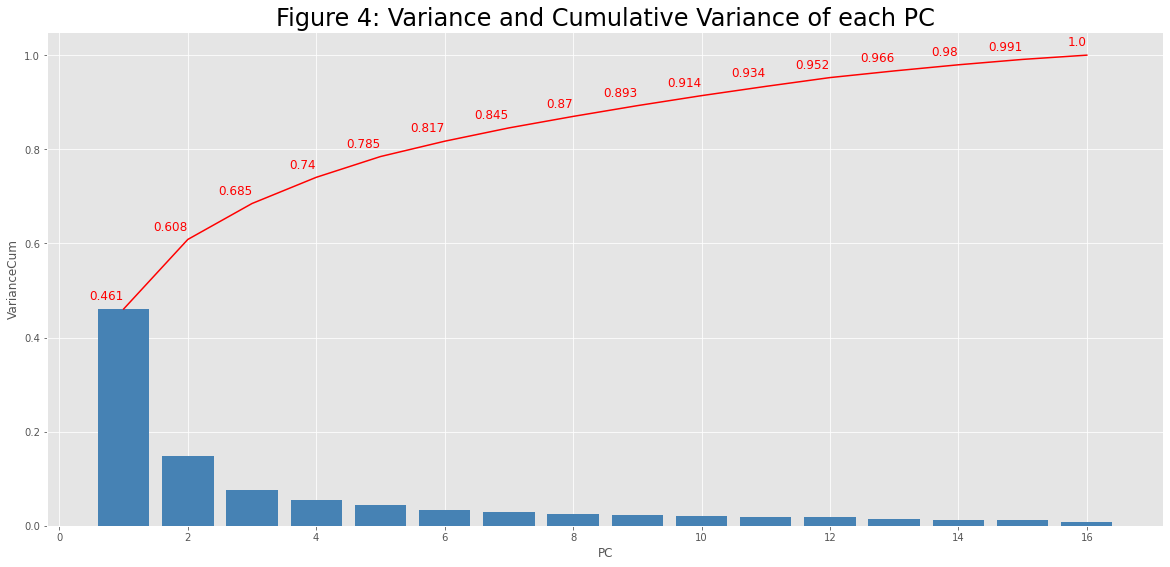

In [8]:
############################## PLOT PCA EXPLANATORY POWER ###################################
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.bar(data = summary,
         height = 'Variance', x = 'PC', color="steelblue")
sns.lineplot(data = summary,
         y = 'VarianceCum', x = 'PC', color="red")
for i, v in enumerate(round(summary.VarianceCum,3)):
    plt.text(summary.PC.tolist()[i], v+0.02, str(v), ha='right', 
             fontsize = 12, color = 'red')
plt.title('Figure 4: Variance and Cumulative Variance of each PC', size=24)
plt.show()

In [9]:
from statsmodels.regression.rolling import RollingOLS

############################## DEFINE ALL REGRESSION VARIABLE AND PARAMETERS ###################################
K = (pca_model.rsquare < 0.859).sum()-1 #numero fattori 
if K == 0:
    K = 1
f = pca_model.factors.iloc[:, 0:K]
X = Stocks_returns.copy()
Xf = pd.merge(X, f, on='Date', how="inner")

T = Xf.shape[0] #istanti temorali
N = X.shape[1] #numero regressioni da calcolare
rw = 28

rparam = np.zeros((N,K,T)) #betas
rOmega = np.zeros((N,N,T)) #covarianza error terms
fSigma = np.zeros((K,K,T)) #covarianza fattori
Sigma_PCA = np.zeros((N,N,T)) #covarianza finale
Corr_PCA = np.zeros((N,N,T))


fSigma = np.array(Xf[list(Xf.columns.values[N:])].rolling(rw).cov())
fSigma = fSigma.reshape(1, K*K*T)
fSigma = fSigma.reshape(K,K,T, order='F')

exog= f #regressori 

############################## compute betas and omega error ###################################
for i in np.arange(N):    
    endog = Xf.iloc[:, i]
    rols = RollingOLS(endog, exog, window = rw, missing = 'drop')
    rres = rols.fit()  
    rparam[i,:,:] = np.array(rres.params).T     
    rOmega[i,i,:] = np.array(rres.mse_resid)      

############################## compute covariance matrix of returns ###################################
for i in np.arange(T):
    Sigma_PCA[:,:,i] = rparam[:, : , i]@fSigma[:, : , i]@rparam[:, : , i].T+rOmega[:, : , i]

dS=np.sqrt(np.diagonal(Sigma_PCA, axis1 = 0, axis2 = 1))
dS=dS.reshape(1,1*N*T)
dS=dS.reshape(1,N,T,order = 'F')

############################## compute correlation matrix of returns ###################################

for i in np.arange(T):
    Corr_PCA[:,:,i] = Sigma_PCA[:,:,i]/dS[:,:,i]

#flag 
print('CALCOLO DELLA COVARIANZA E CORRELAZIONE COMPLETATO ','\n',
     'NUMERO DI AZIONI:',N,'\n',
     'NUMERO DI FATTORI CONSIDERATI:',K,'\n',
     'ISTANTI TEMPORALI TOTALI:',T,'\n',
     'MEDIA MOBILE A',rw,'GIORNI')

CALCOLO DELLA COVARIANZA E CORRELAZIONE COMPLETATO  
 NUMERO DI AZIONI: 16 
 NUMERO DI FATTORI CONSIDERATI: 7 
 ISTANTI TEMPORALI TOTALI: 257 
 MEDIA MOBILE A 28 GIORNI


In [10]:
############################## adjustment for futher steps ###################################
SigmaPCA = Sigma_PCA[:,:,rw-1:T-1]
Stocks_returnsMean = np.zeros((T-rw,N))
for t in np.arange(rw-1,T-1):
    Stocks_returnsMean[t-rw] = Stocks_returns[:t].mean()

### Step 3 - Construction of portfolios using the covariance matrix estimated by the PCA method

In the following, Markowitz-style portfolios are estimated. At each time instant, a number of portfolios equal to the value of the variable 'nPort' are calculated, the weights of which are calculated randomly at each time instant in order to give more dynamicity to the portfolios. It should be added that in this simulation short selling was not considered, within the portfolios the securities only have long positions and a free-risk rate of zero is considered.

The formulas applied to calculate the returns, variance and Sharpe index for each portfolio are:

\begin{equation}
E(R_{pt}) = \sum_{i=1}^{N}w_{it}E(R_{it})
\end{equation}

\begin{equation}
\sigma_{pt}^{2} = \sum_{i=1}^{N}w_{it}^2\sigma_{it}^2+\sum_{i=1}^N\sum_{j \neq i}^N w_i w_j \sigma_i \sigma_j \rho_{ij} 
\end{equation}

\begin{equation}
SR_{pt} =  \frac{E(R_{pt})}{\sigma_{pt}^{2}}
\end{equation}

The result of these calculations is represented in the graph below - Figure 5. On the y-axis is time, on the coordinate axis is the standard deviation and on the third axis is the returns. The sharpe index, on the other hand, is represented by the colour variation of the data - the clearer the point in the graph, the higher the return for the portfolio risk.

In [13]:
############################## VARIABLES AND ARRAYS CREATION ###################################
nPort = 10000 # numero di portafolgi da calcolare
nT = SigmaPCA.shape[2] # numero di istanti temporali considerati
weights = np.zeros((N,nPort,nT)) 
Metrics = np.zeros((4,nPort,nT)) # array delle metriche

############################## PORTFOLIO COMPUTATION ###################################
for t in np.arange(nT): # tempo
    #rendimento medio al istante temporale t
    Mu = Stocks_returnsMean[t]
    #flag temporale
    Metrics[3,:,t] = t
    for p in np.arange(nPort): #portafolfio
        #generetore dei pesi randomici
        w = np.array(np.random.random(N))
        w = w/np.sum(w)
        weights[:,p,t] = w
        #Expected return
        Metrics[0,p,t]= np.sum( Mu * w)
        #Expected volatility 
        Metrics[1,p,t] = np.sqrt(np.dot(w.T,np.dot(SigmaPCA[:,:,t],w)))
        #Sharpe ratio
        Metrics[2,p,t] = Metrics[0,p,t] / Metrics[1,p,t]

C:\Users\nece5\AppData\Local\Temp\ipykernel_1644\3241638033.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(fg, label = 'Sharpe ratio')


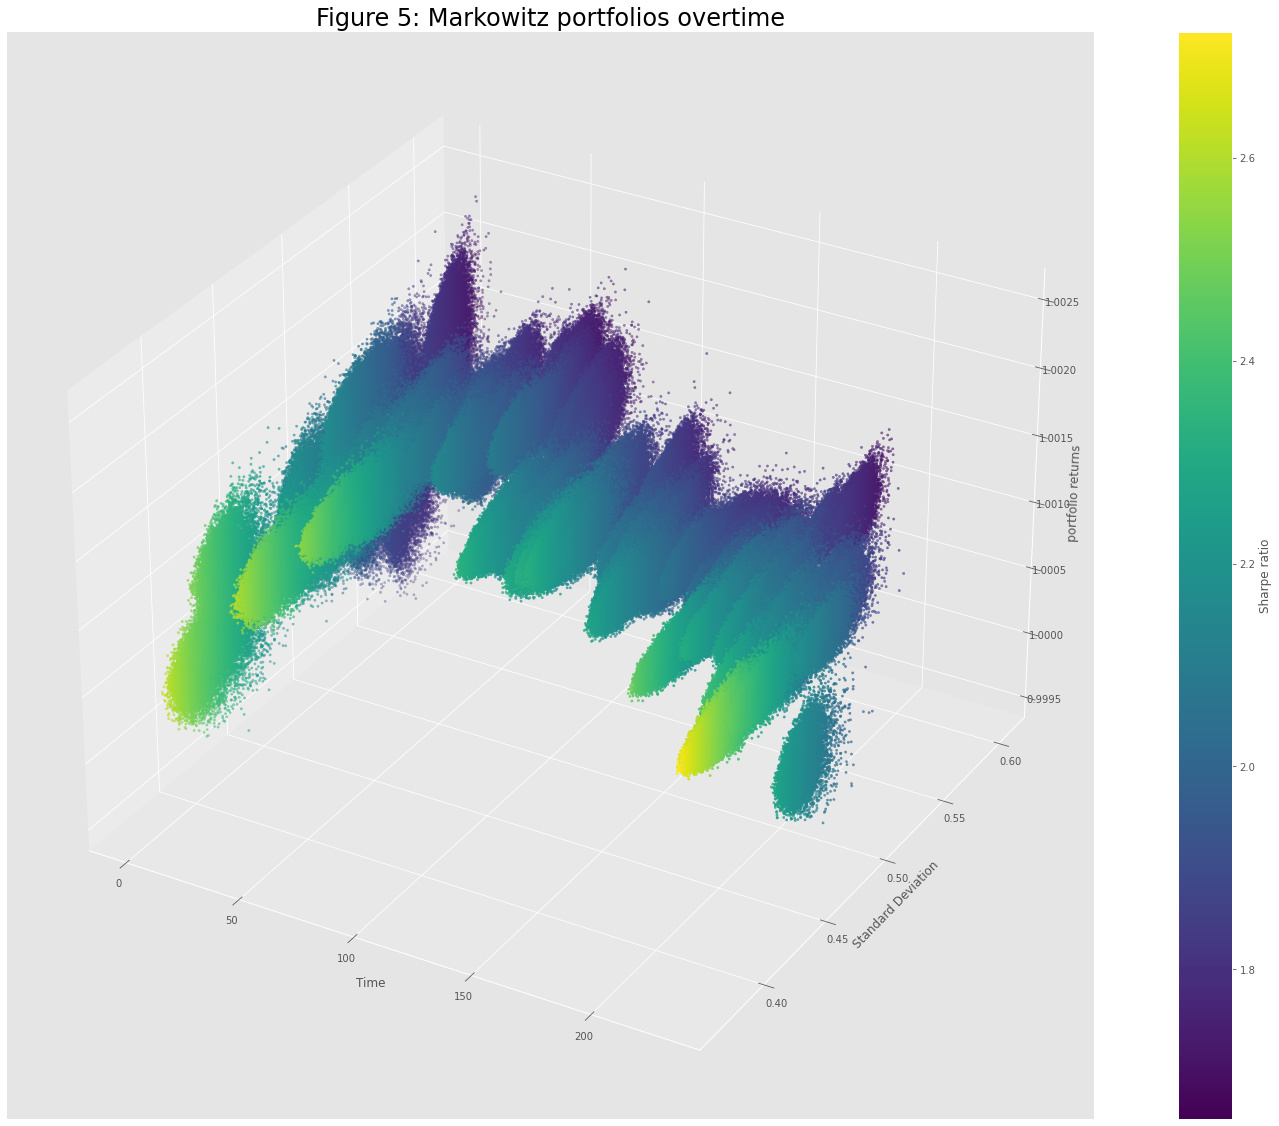

In [14]:
############################## PLOT PORTFOLIOS ###################################
plt.figure(figsize=(30,20))
ax  = plt.axes(projection = '3d')
x_data=Metrics[1,:,:] #volatility
y_data=Metrics[0,:,:] # returns
z_data= Metrics[3,:,:] #time
fg = ax.scatter3D(z_data,x_data,y_data, s = 5,c = Metrics[2,:,:])
plt.colorbar(fg, label = 'Sharpe ratio')
ax.set_xlabel("Time")
ax.set_ylabel("Standard Deviation")
ax.set_zlabel("portfolio returns")
ax.set_title('Figure 5: Markowitz portfolios overtime', fontsize = 24);

## Step 4 - Calculation of efficiency frontiers at various time instants
For each time instant, the efficiency frontier of the Markowitz model is calculated. The problem is to minimise the variance of portfolios by maximising the return and thus generating a higher return for risk, all by changing the weights within the portfolios. In the following code, the same result is achieved by minimising the negative sharpe ratio. In algebraic terms 

\begin{equation}
\text{minimize} \\\ -SR(w) \\\
\text{subject to} \\\ w \geq 0 \\\ 1^Tw=1
\end{equation}


The result of these calculations is shown in the graph below - Figure 6 - where the values in the axes remain the same and what is added are the efficiency frontiers represented by red curves. 

In [15]:
from scipy.optimize import minimize

def negativeSR(W):
    R = np.sum(Mu*W)
    V = np.sqrt(np.dot(W.T,np.dot(Sigma,W)))
    SR = R/V
    return -1*SR

def checkSum (W):
    return np.sum(W)-1

def minimizeMyVolatility(w):
    V=np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    return V

def getReturn(w):
    R=np.sum(Mu*w)
    return R

In [19]:
opt_pf = np.zeros((3,1,nT))
frontiers =  np.zeros((3,200,nT))

for t in np.arange(nT):
    Mu = Stocks_returnsMean[t]
    ExpectedReturns = Metrics[0,:,t]
    ExpectedVolatility = Metrics[1,:,t]
    sharpeRatio = Metrics[2,:,t]
    Sigma = SigmaPCA[:,:,t]
    maxIndex = sharpeRatio.argmax()
    
    bounds = tuple((0,1) for asset in range(N))
    constraints = ({'type':'eq','fun':checkSum})
    w0 = N*[1./N]
    w_opt = minimize(negativeSR,w0,method = 'SLSQP', bounds = bounds , constraints = constraints)
    w_opt.x
    opt_pf[0,:,t] = np.sum(Mu*w_opt.x)
    opt_pf[1,:,t] = np.sqrt(np.dot(w_opt.x.T,np.dot(Sigma,w_opt.x)))
    opt_pf[2,:,t] = t
    
    origin_y = np.linspace(ExpectedReturns.min(),ExpectedReturns.max(),200)
    origin_x=[]
    for R in origin_y:
        #find best volatility
        constraints=({'type':'eq','fun':checkSum},
                     {'type':'eq','fun':lambda w: getReturn(w)-R})
        opt = minimize(minimizeMyVolatility,w0,method='SLSQP', bounds = bds,constraints=constraints)
        #save my optimal volatility
        origin_x.append(opt['fun'])
    frontiers[0,:,t] = np.array(origin_x)
    frontiers[1,:,t] = origin_y
    frontiers[2,:,t] = t 

C:\Users\nece5\AppData\Local\Temp\ipykernel_1644\404773684.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(fg, label = 'Sharpe ratio')


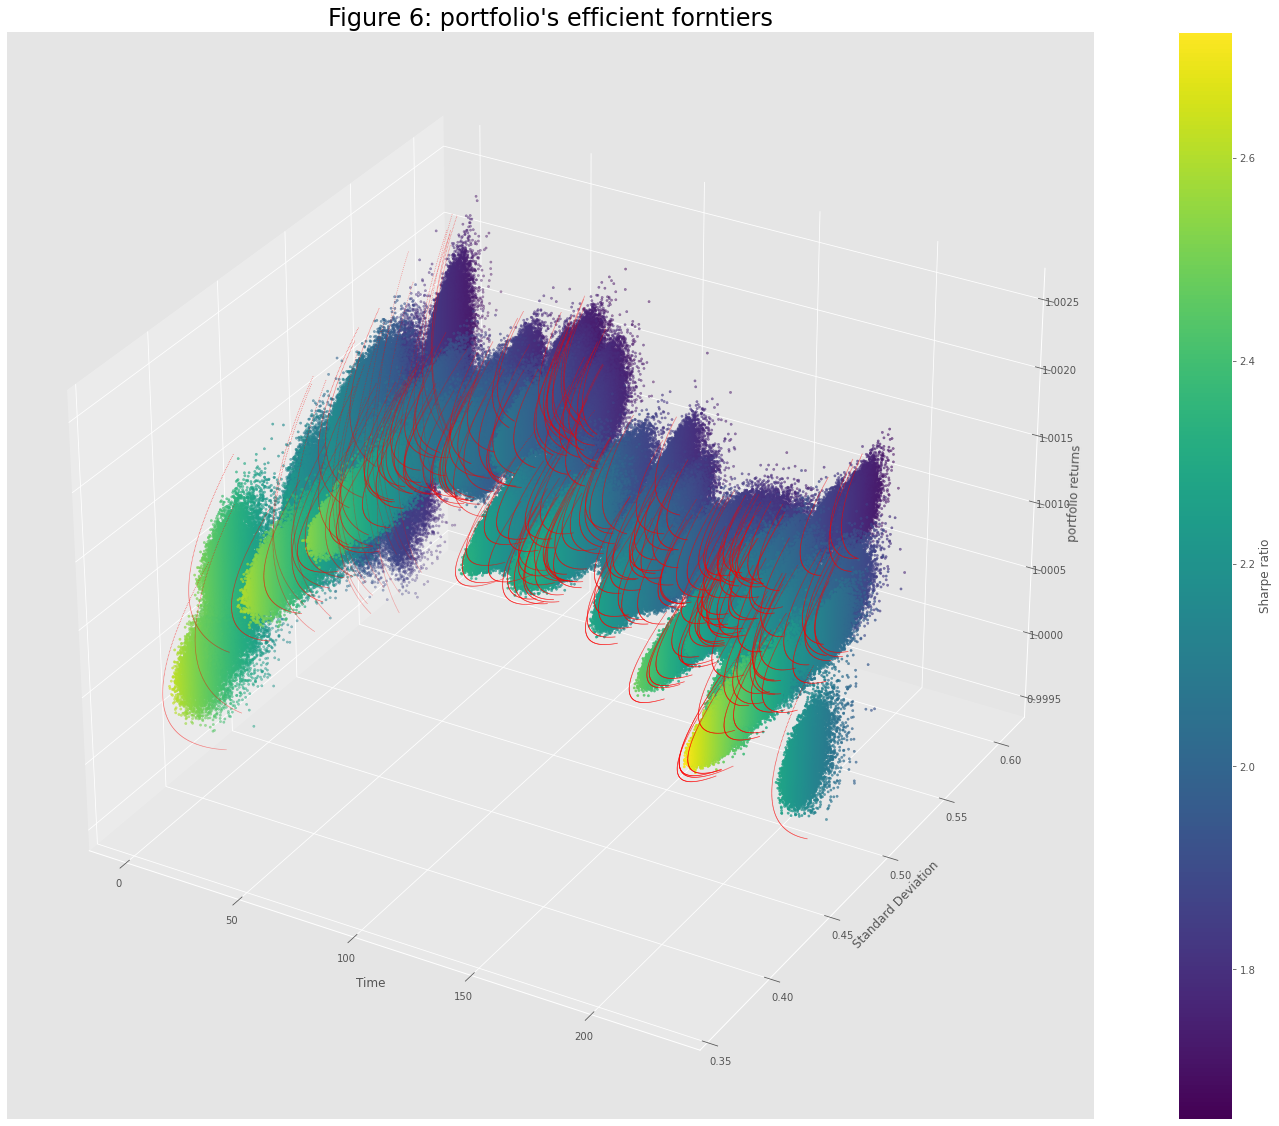

In [20]:
plt.figure(figsize=(30,20))
ax  = plt.axes(projection = '3d')
x_data=Metrics[1,:,:] #volatility
y_data=Metrics[0,:,:] # returns
z_data= Metrics[3,:,:] # 
fg = ax.scatter3D(z_data,x_data,y_data, s = 5,c = Metrics[2,:,:])
fg2 = ax.scatter3D(frontiers[2,:,:],frontiers[0,:,:],frontiers[1,:,:], c = 'red',s=0.1)
plt.colorbar(fg, label = 'Sharpe ratio')
ax.set_xlabel("Time")
ax.set_ylabel("Standard Deviation")
ax.set_zlabel("portfolio returns")
ax.set_title("Figure 6: portfolio's efficient forntiers", fontsize = 24);

### IMPLEMENTATION WITH USER INTERACTION
Finally, in order to be able to perform an analysis by time instants, the user is given the possibility of selecting a time instant, within the interval for which the following will be represented in a graph (Figure 7): the various portfolios, the efficiency frontier, the portfolio with the highest sharpe index on the frontier and the portfolio with the highest sharpe index among the calculated portfolios.

Select a time instant between 0 and 228 200


C:\Users\nece5\AppData\Local\Temp\ipykernel_1644\1423908320.py:36: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='SharpeRatio')


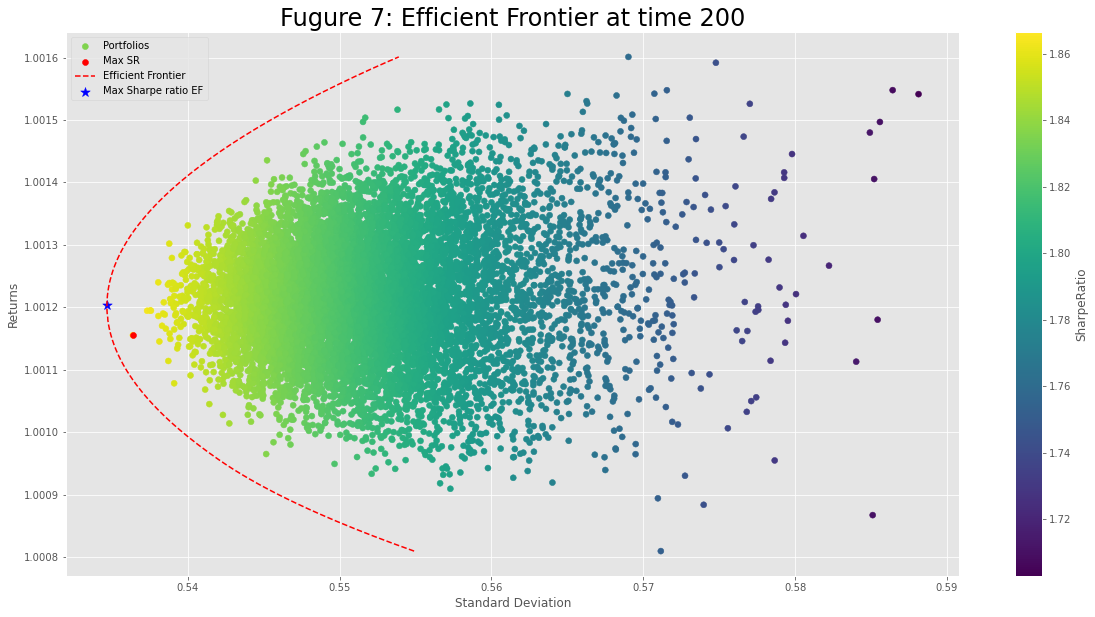

In [22]:
t = int(input("Select a time instant between 0 and "+str(nT-1)+" " ))
if (t < 0) or (t > nT-1):
    print('Chosen value out of the interval','\n','YOU DIGITED:',t)
else:
    Mu = Stocks_returnsMean[t]
    ExpectedReturns = Metrics[0,:,t]
    ExpectedVolatility = Metrics[1,:,t]   
    sharpeRatio = Metrics[2,:,t]
    Sigma = SigmaPCA[:,:,t]
    maxIndex = sharpeRatio.argmax()
    
    bounds = tuple((0,1) for asset in range(N))
    constraints = ({'type':'eq','fun':checkSum})
    w0 = N*[1./N]
    
    w_opt = minimize(negativeSR,w0,method = 'SLSQP', bounds = bounds , constraints = constraints)
    
    R_opt = np.sum(Mu*w_opt.x)
    V_opt = np.sqrt(np.dot(w_opt.x.T,np.dot(Sigma,w_opt.x)))
    
    origin_y = np.linspace(ExpectedReturns.min(),ExpectedReturns.max(),200)
    origin_x=[]
    
    for R in origin_y:
        #find best volatility
        constraints=({'type':'eq','fun':checkSum},
                     {'type':'eq','fun':lambda w: getReturn(w)-R})
        opt = minimize(minimizeMyVolatility,w0,method='SLSQP',bounds=bounds,constraints=constraints)
        #save my optimal volatility
        origin_x.append(opt['fun'])
        
    plt.figure(figsize=(20,10))
    plt.scatter(ExpectedVolatility,ExpectedReturns,c = sharpeRatio, label = 'Portfolios')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Returns')
    plt.colorbar(label='SharpeRatio')
    plt.scatter(ExpectedVolatility[maxIndex],ExpectedReturns[maxIndex], c='red', label = 'Max SR')
    plt.plot(origin_x,origin_y, 'r--', linewidth=1.5 , label = 'Efficient Frontier')
    plt.scatter(V_opt,R_opt,c='blue',marker='*',s=100, label = 'Max Sharpe ratio EF')
    plt.legend()
    plt.title("Fugure 7: Efficient Frontier at time "+ str(t),fontsize=24)
    plt.show()